# IMPORT LIBRARIES AND DATASETS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/DATA")
!ls

Mounted at /content/drive
Emotions.txt	   ner_dataset.csv		   small_vocab_fr.csv
glove.6B.200d.txt  NHC_data_Biju.xlsx		   special_tokens_map.json
glove.6B.50d.txt   Quora_question_pairs_test.csv   theta.txt
model_100.pth	   Quora_question_pairs_train.csv  tokenizer_config.json
model.png	   small_vocab_en.csv		   vocab.txt
ner.csv		   small_vocab_en.gsheet


In [ ]:
!pip install --upgrade 'tensorflow-gpu==2.0'
!pip install wordcloud

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 3.8MB 41.4MB/s 
     |████████████████████████████████| 450kB 54.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=c3b64e4d1e6508c112e84b8959c41aff403828c16a0b7511b62bdadf8f80adfb
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing insta

In [ ]:
# install nltk
!pip install nltk
# install gensim
!pip install gensim
# install spacy
!pip install spacy
!pip install plotly

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import tensorflow
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model

# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [ ]:
# load the data
df_english = pd.read_csv('small_vocab_en.csv', sep = '/t', names = ['english'])
df_french = pd.read_csv('small_vocab_fr.csv', sep = '/t', names = ['french'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [ ]:
df_english.head()

,english
0,"new jersey is sometimes quiet during autumn , ..."
1,the united states is usually chilly during jul...
2,"california is usually quiet during march , and..."
3,the united states is sometimes mild during jun...
4,"your least liked fruit is the grape , but my l..."


In [ ]:
df_french.head()

,french
0,new jersey est parfois calme pendant l' automn...
1,les états-unis est généralement froid en juill...
2,"california est généralement calme en mars , et..."
3,"les états-unis est parfois légère en juin , et..."
4,"votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
df = pd.concat([df_english, df_french], axis=1)

In [ ]:
df.head()

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."


In [ ]:
print("Total English Records = {}".format(len(df['english'])))
print("Total French Records = {}".format(len(df['french'])))

Total English Records = 137860
Total French Records = 137860


# PERFORM DATA CLEANING

In [ ]:
# download nltk packages
nltk.download('punkt')

# download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# function to remove punctuations
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [ ]:
df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [ ]:
english_words = []
french_words  = []

In [ ]:
def get_unique_word(x, word_list):
    for word in x.split():
        if word not in word_list:
            word_list.append(word)



In [ ]:
for x in df['english']:
    get_unique_word(x, english_words)
    

In [ ]:
Total_english_words = len(english_words)
print(Total_english_words)

199


In [ ]:
# number of unique words in french
for x in df['french']:
    get_unique_word(x, french_words)

In [ ]:
Total_french_words=len(french_words)
print(Total_french_words)


350


# VISUALIZE CLEANED UP DATASET

In [ ]:
# Obtain list of all words in the dataset
words = []
for i in df['english']:
  for word in i.split():
    words.append(word)
    
words[0:5]

['new', 'jersey', 'is', 'sometimes', 'quiet']

In [ ]:
# Obtain the total count of words
english_words_counts = Counter(words)
print(english_words_counts)

Counter({'is': 205858, 'in': 75525, 'it': 75137, 'during': 74933, 'the': 67628, 'but': 63987, 'and': 59850, 'sometimes': 37746, 'usually': 37507, 'never': 37500, 'favorite': 28332, 'least': 27564, 'fruit': 27192, 'most': 14934, 'loved': 14166, 'liked': 14046, 'new': 12197, 'paris': 11334, 'india': 11277, 'united': 11270, 'states': 11270, 'california': 11250, 'jersey': 11225, 'france': 11170, 'china': 10953, 'he': 10786, 'she': 10786, 'grapefruit': 10692, 'your': 9734, 'my': 9700, 'his': 9700, 'her': 9700, 'fall': 9134, 'june': 9133, 'spring': 9102, 'january': 9090, 'winter': 9038, 'march': 9023, 'autumn': 9004, 'may': 8995, 'nice': 8984, 'september': 8958, 'july': 8956, 'april': 8954, 'november': 8951, 'summer': 8948, 'december': 8945, 'february': 8942, 'our': 8932, 'their': 8932, 'freezing': 8928, 'pleasant': 8916, 'beautiful': 8915, 'october': 8910, 'snowy': 8898, 'warm': 8890, 'cold': 8878, 'wonderful': 8808, 'dry': 8794, 'busy': 8791, 'august': 8789, 'chilly': 8770, 'rainy': 8761, 

In [ ]:
# sort the dictionary by values
english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
print(english_words_counts)

[('is', 205858), ('in', 75525), ('it', 75137), ('during', 74933), ('the', 67628), ('but', 63987), ('and', 59850), ('sometimes', 37746), ('usually', 37507), ('never', 37500), ('favorite', 28332), ('least', 27564), ('fruit', 27192), ('most', 14934), ('loved', 14166), ('liked', 14046), ('new', 12197), ('paris', 11334), ('india', 11277), ('united', 11270), ('states', 11270), ('california', 11250), ('jersey', 11225), ('france', 11170), ('china', 10953), ('he', 10786), ('she', 10786), ('grapefruit', 10692), ('your', 9734), ('my', 9700), ('his', 9700), ('her', 9700), ('fall', 9134), ('june', 9133), ('spring', 9102), ('january', 9090), ('winter', 9038), ('march', 9023), ('autumn', 9004), ('may', 8995), ('nice', 8984), ('september', 8958), ('july', 8956), ('april', 8954), ('november', 8951), ('summer', 8948), ('december', 8945), ('february', 8942), ('our', 8932), ('their', 8932), ('freezing', 8928), ('pleasant', 8916), ('beautiful', 8915), ('october', 8910), ('snowy', 8898), ('warm', 8890), ('c

In [ ]:
# append the values to a list for visualization purposes
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [ ]:
print(english_words)

['is', 'in', 'it', 'during', 'the', 'but', 'and', 'sometimes', 'usually', 'never', 'favorite', 'least', 'fruit', 'most', 'loved', 'liked', 'new', 'paris', 'india', 'united', 'states', 'california', 'jersey', 'france', 'china', 'he', 'she', 'grapefruit', 'your', 'my', 'his', 'her', 'fall', 'june', 'spring', 'january', 'winter', 'march', 'autumn', 'may', 'nice', 'september', 'july', 'april', 'november', 'summer', 'december', 'february', 'our', 'their', 'freezing', 'pleasant', 'beautiful', 'october', 'snowy', 'warm', 'cold', 'wonderful', 'dry', 'busy', 'august', 'chilly', 'rainy', 'mild', 'wet', 'relaxing', 'quiet', 'hot', 'dislikes', 'likes', 'limes', 'lemons', 'grapes', 'mangoes', 'apples', 'peaches', 'oranges', 'pears', 'strawberries', 'bananas', 'to', 'grape', 'apple', 'orange', 'lemon', 'lime', 'banana', 'mango', 'pear', 'strawberry', 'peach', 'like', 'dislike', 'they', 'that', 'i', 'we', 'you', 'animal', 'a', 'truck', 'car', 'automobile', 'was', 'next', 'go', 'driving', 'visit', 'li

In [ ]:
print(english_counts)

[205858, 75525, 75137, 74933, 67628, 63987, 59850, 37746, 37507, 37500, 28332, 27564, 27192, 14934, 14166, 14046, 12197, 11334, 11277, 11270, 11270, 11250, 11225, 11170, 10953, 10786, 10786, 10692, 9734, 9700, 9700, 9700, 9134, 9133, 9102, 9090, 9038, 9023, 9004, 8995, 8984, 8958, 8956, 8954, 8951, 8948, 8945, 8942, 8932, 8932, 8928, 8916, 8915, 8910, 8898, 8890, 8878, 8808, 8794, 8791, 8789, 8770, 8761, 8743, 8726, 8696, 8693, 8639, 7314, 7314, 5844, 5844, 5844, 5844, 5844, 5844, 5844, 5844, 5844, 5844, 5166, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4848, 4588, 4444, 3222, 2712, 2664, 2532, 2414, 2304, 1944, 1944, 1944, 1944, 1867, 1666, 1386, 1296, 1224, 1016, 1016, 972, 972, 972, 972, 972, 972, 972, 972, 972, 870, 781, 768, 768, 768, 714, 666, 648, 648, 648, 648, 540, 480, 476, 384, 378, 378, 378, 360, 312, 312, 312, 312, 312, 300, 260, 260, 260, 252, 240, 240, 240, 204, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 144, 126, 84, 67, 64, 64, 64, 64, 64, 64

In [ ]:
# Plot barplot using plotly 
fig = px.bar(x = english_words, y = english_counts)
fig.show()

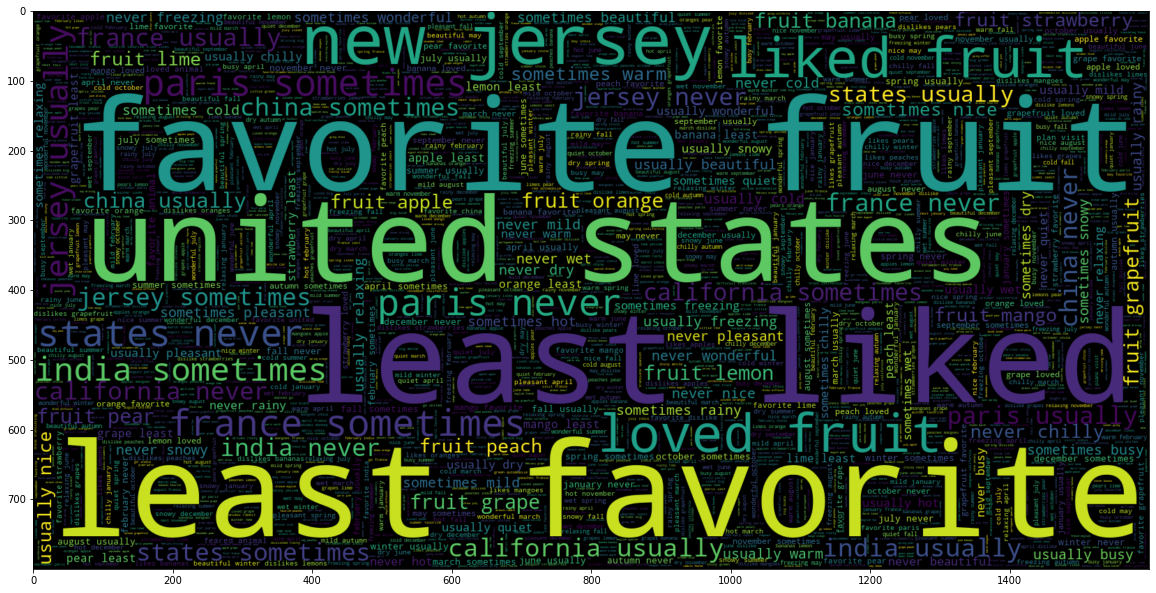

In [ ]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000, width = 1600, height = 800 ).generate(" ".join(df.english))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
df.english[0]
nltk.word_tokenize(df.english[0])

['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april']

In [ ]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_english = -1
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_english < len(tokens)):
        maxlen_english = len(tokens)
print("The maximum number of words in any document = ", maxlen_english)

The maximum number of words in any document =  15


In [ ]:
# obtain the count of french words
words = []
for i in df['french']:
  for word in i.split():
    words.append(word)
words

french_words_counts = Counter(words)
print(french_words_counts)

Counter({'est': 196809, 'en': 105768, 'il': 84079, 'les': 65255, 'mais': 63987, 'et': 59851, 'la': 49861, 'parfois': 37746, 'jamais': 37215, 'le': 35306, "l'": 32917, 'généralement': 31292, 'moins': 27557, 'aimé': 25852, 'au': 25738, 'fruit': 23626, 'préféré': 23305, 'agréable': 17751, 'froid': 16794, 'son': 16496, 'chaud': 16405, 'de': 15070, 'plus': 14934, 'automne': 14727, 'mois': 14350, 'à': 13870, 'elle': 12056, 'citrons': 11679, 'paris': 11334, 'inde': 11277, 'états-unis': 11210, 'france': 11170, 'jersey': 11052, 'new': 11047, 'chine': 10936, 'pendant': 10741, 'pamplemousse': 10140, 'mon': 9403, 'votre': 9368, 'juin': 9133, 'printemps': 9100, 'janvier': 9090, 'hiver': 9038, 'mars': 9023, 'été': 8999, 'mai': 8995, 'septembre': 8958, 'juillet': 8956, 'avril': 8954, 'novembre': 8951, 'décembre': 8945, 'février': 8942, 'octobre': 8911, 'aime': 8870, 'août': 8789, 'merveilleux': 8704, 'relaxant': 8458, 'doux': 8458, 'humide': 8446, 'notre': 8319, 'californie': 8189, 'sec': 7957, 'leur

In [ ]:
# sort the dictionary by values
french_words_counts = sorted(french_words_counts.items(), key = operator.itemgetter(1), reverse = True)

print(french_words_counts)

[('est', 196809), ('en', 105768), ('il', 84079), ('les', 65255), ('mais', 63987), ('et', 59851), ('la', 49861), ('parfois', 37746), ('jamais', 37215), ('le', 35306), ("l'", 32917), ('généralement', 31292), ('moins', 27557), ('aimé', 25852), ('au', 25738), ('fruit', 23626), ('préféré', 23305), ('agréable', 17751), ('froid', 16794), ('son', 16496), ('chaud', 16405), ('de', 15070), ('plus', 14934), ('automne', 14727), ('mois', 14350), ('à', 13870), ('elle', 12056), ('citrons', 11679), ('paris', 11334), ('inde', 11277), ('états-unis', 11210), ('france', 11170), ('jersey', 11052), ('new', 11047), ('chine', 10936), ('pendant', 10741), ('pamplemousse', 10140), ('mon', 9403), ('votre', 9368), ('juin', 9133), ('printemps', 9100), ('janvier', 9090), ('hiver', 9038), ('mars', 9023), ('été', 8999), ('mai', 8995), ('septembre', 8958), ('juillet', 8956), ('avril', 8954), ('novembre', 8951), ('décembre', 8945), ('février', 8942), ('octobre', 8911), ('aime', 8870), ('août', 8789), ('merveilleux', 8704

In [ ]:
# append the values to a list for visuaization purpose
french_words = []
french_counts = []
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])

fig = px.bar(x = french_words, y = french_counts)
fig.show()

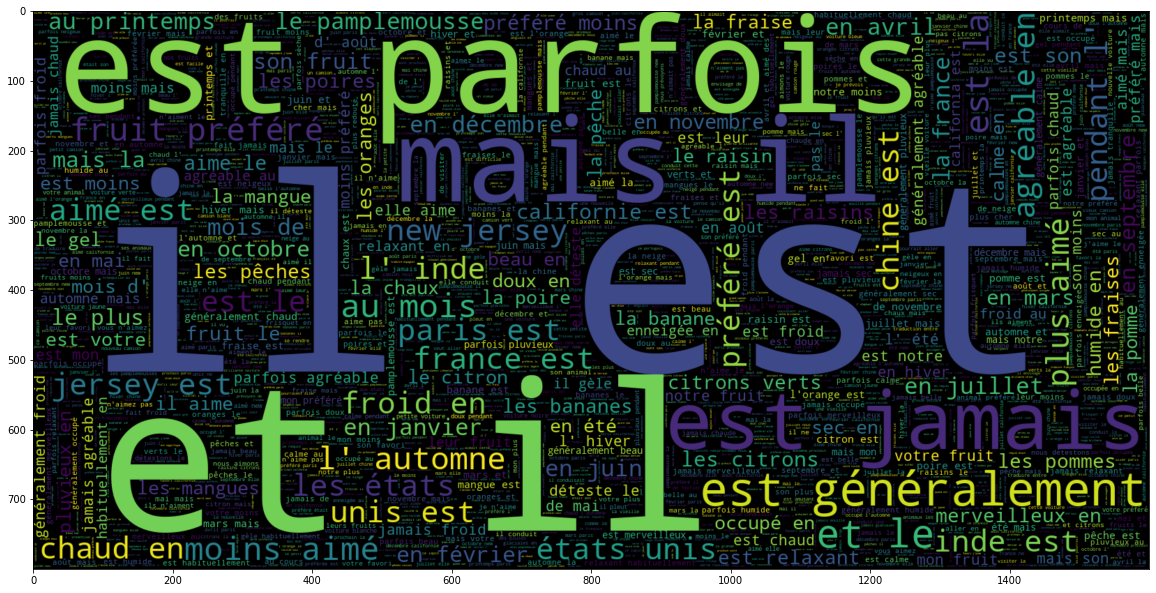

In [ ]:
# plot the word cloud for French
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.french))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
# Maximum length (number of words) per document. We will need it later for embeddings
maxlen_french = -1
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if(maxlen_french < len(tokens)):
        maxlen_french = len(tokens)
print("The maximum number of words in any document = ", maxlen_french)

The maximum number of words in any document =  23


# PREPARE THE DATA BY PERFORMING TOKENIZATION AND PADDING

In [ ]:
def tokenize_and_pad(x, maxlen):
  #  a tokenier to tokenize the words and create sequences of tokenized words
  tokenizer = Tokenizer(char_level = False)
  tokenizer.fit_on_texts(x)
  sequences = tokenizer.texts_to_sequences(x)
  padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')
  return tokenizer, sequences, padded

In [ ]:
# tokenize and padding to the data 
maxlen = max(maxlen_english, maxlen_french)
x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french,  maxlen)

In [ ]:
# Total vocab size, since we added padding we add 1 to the total word count
english_vocab_size = Total_english_words + 1
print("Complete English Vocab Size:", english_vocab_size)

Complete English Vocab Size: 200


In [ ]:
# Total vocab size, since we added padding we add 1 to the total word count
french_vocab_size = Total_french_words + 1
print("Complete French Vocab Size:", french_vocab_size)

Complete French Vocab Size: 351


In [ ]:
print("The tokenized version for document\n", df.english[-1:].item(),"\n is : ", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit  but the banana is your favorite  
 is :  [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
print("The tokenized version for document\n", df.french[-1:].item(),"\n is : ", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is :  [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [ ]:
pad_to_text(y_padded[0], y_tokenizer)

"new jersey est parfois calme pendant l' automne et il est neigeux en avril         "

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [ ]:
x_train.shape

(124074, 23)

# BUILD AND TRAIN THE MODEL 

In [ ]:
# Sequential Model
model = Sequential()
# embedding layer
model.add(Embedding(english_vocab_size, 256, input_length = maxlen, mask_zero = True))
# encoder
model.add(LSTM(256))
# decoder
# repeatvector repeats the input for the desired number of times to change
# 2D-array to 3D array. For example: (1,256) to (1,23,256)
model.add(RepeatVector(maxlen))
model.add(LSTM(256, return_sequences= True ))
model.add(TimeDistributed(Dense(french_vocab_size, activation ='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 23, 256)           51200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 256)               525312    
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 23, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 23, 256)           525312    
_________________________________________________________________
time_distributed_5 (TimeDist (None, 23, 351)           90207     
Total params: 1,192,031
Trainable params: 1,192,031
Non-trainable params: 0
_________________________________________________________________


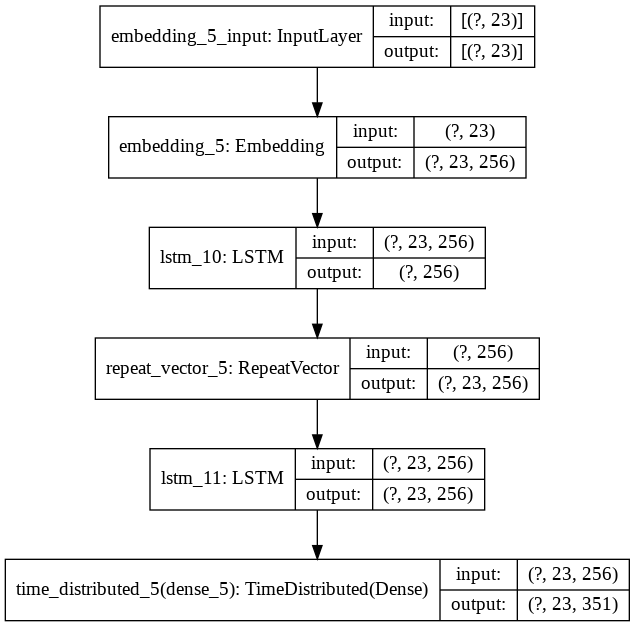

In [ ]:
tensorflow.keras.utils.plot_model(model, show_shapes = True, show_layer_names= True)

In [ ]:
# change the shape of target from 2D to 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1024, validation_split = 0.2 , epochs=20)

Train on 99259 samples, validate on 24815 samples
Epoch 1/20
99259/99259 [==============================] - 13s 134us/sample - loss: 2.7853 - accuracy: 0.4900 - val_loss: 2.1676 - val_accuracy: 0.5377
Epoch 2/20
99259/99259 [==============================] - 7s 71us/sample - loss: 2.0406 - accuracy: 0.5527 - val_loss: 1.9047 - val_accuracy: 0.5747
Epoch 3/20
99259/99259 [==============================] - 7s 70us/sample - loss: 1.6585 - accuracy: 0.5997 - val_loss: 1.4998 - val_accuracy: 0.6135
Epoch 4/20
99259/99259 [==============================] - 7s 70us/sample - loss: 1.4088 - accuracy: 0.6315 - val_loss: 1.3329 - val_accuracy: 0.6451
Epoch 5/20
99259/99259 [==============================] - 7s 70us/sample - loss: 1.2657 - accuracy: 0.6559 - val_loss: 1.1973 - val_accuracy: 0.6694
Epoch 6/20
99259/99259 [==============================] - 7s 70us/sample - loss: 1.1307 - accuracy: 0.6820 - val_loss: 1.0647 - val_accuracy: 0.6975
Epoch 7/20
99259/99259 [==============================

In [ ]:
# save the model
model.save("MT_LSTM_weights.h5")

# ASSESS TRAINED MODEL PERFORMANCE


In [ ]:
# function to make prediction
def prediction(x, x_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(x)[0]
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [ ]:
# function to obtain the text from padded variables
def pad_to_text(padded, tokenizer):

    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''

    return ' '.join([id_to_word[j] for j in padded])

In [ ]:
for i in range(5):

  print('Original English word - {}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
  print('Predicted French word - {}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word - paris is usually cold during spring and it is usually pleasant in june          

Original French word - paris est généralement froid au printemps et il est généralement agréable en juin          

Predicted French word - paris est généralement froid au printemps et il est généralement agréable en juin          




Original English word - he went to california last november                 

Original French word - il est allé en novembre dernier en californie               

Predicted French word - il est allé en en en novembre dernier               




Original English word - he likes apples and bananas                  

Original French word - il aime les pommes et les bananes                

Predicted French word - il aime les pommes et les bananes                




Original English word - california is cold during fall and it is warm in september            

Original French word - californie est froid à l'automne et il est chaud en septembre           